# IRIS project 
### data Loading

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

In [80]:
df=pd.read_csv("IRIS.csv")

In [81]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [82]:
df.shape

(150, 5)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [84]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [85]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


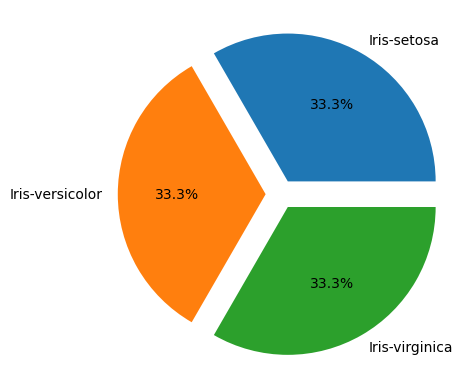

In [86]:
counter = df['species'].value_counts()
plt.pie(counter, labels = df['species'].unique(),autopct='%1.1f%%',explode=(.1,.1,.1))

print(counter)
plt.show()

In [87]:
fig = px.scatter(data_frame=df, x='sepal_length',color='species')
fig.update_layout(width=800, height=600,
                  xaxis=dict(title='sepallength',color="#BF40BF"),
                 yaxis=dict(title="Flower Name",color="#BF40BF"))
fig.show()

In [88]:
fig = px.scatter(data_frame=df, x='sepal_width',color='species')
fig.update_layout(width=800, height=600,
                  xaxis=dict(title='sepallength',color="#BF40BF"),
                 yaxis=dict(title="Flower Name",color="#BF40BF"))
fig.show()

In [89]:
fig = px.scatter(data_frame=df, x='petal_length',color='species')
fig.update_layout(width=800, height=600,
                  xaxis=dict(title='sepallength',color="#BF40BF"),
                 yaxis=dict(title="Flower Name",color="#BF40BF"))
fig.show()

In [90]:
fig = px.scatter(data_frame=df, x='petal_width',color='species')
fig.update_layout(width=800, height=600,
                  xaxis=dict(title='sepallength',color="#BF40BF"),
                 yaxis=dict(title="Flower Name",color="#BF40BF"))
fig.show()

In [91]:
le=LabelEncoder()
df['species']=le.fit_transform(df['species'])

In [92]:
X = df.iloc[:,:-1]
y=df.iloc[:,-1]

In [93]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [94]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int32

In [95]:
X_train, X_test , y_train , y_test = train_test_split(X, y, test_size=0.2, shuffle= True)

In [96]:
print('X train shape = ',X_train.shape)
print('X test shape = ',X_test.shape)
print('y train shape = ',y_train.shape)
print('y test shape = ',y_test.shape)

X train shape =  (120, 4)
X test shape =  (30, 4)
y train shape =  (120,)
y test shape =  (30,)


In [97]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]} 
SVC = GridSearchCV(SVC(),param_grid, verbose=1)
SVC.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=1)

In [98]:
SVC.best_params_

{'C': 1, 'gamma': 0.1}

In [99]:
y_pred = SVC.predict(X_test)

In [100]:
accuracy_score(y_pred,y_test)

1.0

<Axes: >

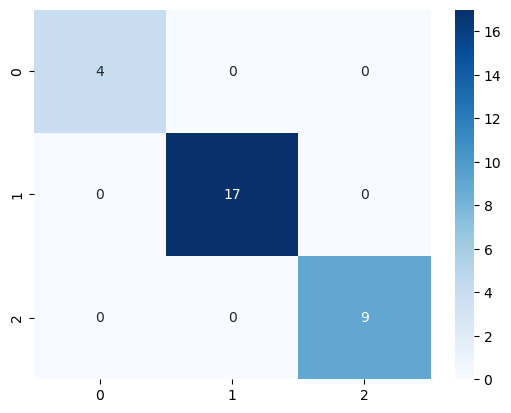

In [103]:
cm =confusion_matrix(y_pred,y_test)
sns.heatmap(cm, annot=True,cmap='Blues')

In [104]:
import pickle 
with open('Iris_model.pkl', 'wb') as file:
    pickle.dump(SVC,file)